In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
def dist_euclidean(x,y):
    return np.sqrt(np.sum((x-y)**2))

In [3]:
def dist_manhattan(x,y):
    return np.sum(np.abs(x-y))

In [4]:
tab = []
for i in range(0, 19):
  tab.append(plt.imread('test-img/{}.jpg'.format(i)))
img_tab = np.array(tab.copy())

In [5]:
hist_data = []
divider = 64
rgb = [] 
for nr in range(len(img_tab)):
    hist_data.append([])
    for i in range(img_tab[nr].shape[0]):
        for j in range(img_tab[nr].shape[1]):
      
            img_tab[nr][i][j][0] = img_tab[nr][i][j][0]//divider
            img_tab[nr][i][j][1] = img_tab[nr][i][j][1]//divider
            img_tab[nr][i][j][2] = img_tab[nr][i][j][2]//divider
           
            temp = "{}{}{}".format(img_tab[nr][i][j][0], img_tab[nr][i][j][1], img_tab[nr][i][j][2])
            hist_data[nr].append(temp)
            if temp not in rgb:
              rgb.append(temp)
            
rgb.sort()

Selected picture:


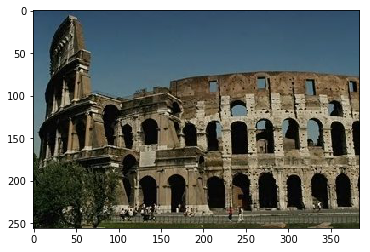

The most similar image found using Euclid:


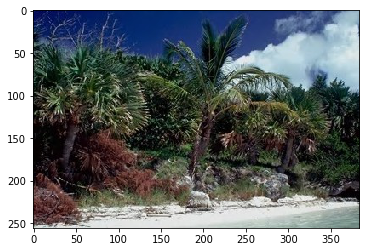

The most similar image found using Manhattan:


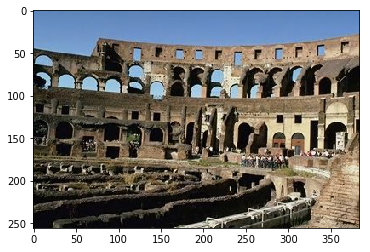

In [6]:
imgIndex = 5

if imgIndex != 0 :
    startImg = 0
else:
    startImg = 1

tab_hist = []
for i in range(len(img_tab)):
    tab_hist.append(np.histogram(hist_data[i], bins=rgb))

minValueEuclides = dist_euclidean(tab_hist[imgIndex][0], tab_hist[startImg][0])
minValueManhattan = dist_manhattan(tab_hist[imgIndex][0], tab_hist[startImg][0])
indexEuclides = startImg
indexManhattan = startImg

for i in range(len(img_tab)):
  if i != imgIndex:
    tempEuclides = dist_euclidean(tab_hist[imgIndex][0], tab_hist[i][0])
    tempManhattan = dist_manhattan(tab_hist[imgIndex][0], tab_hist[i][0])
    if tempEuclides < minValueEuclides:
        minValueEuclides = tempEuclides
        indexEuclides = i
    if tempManhattan < minValueManhattan:
        minValueManhattan= tempManhattan
        indexManhattan = i
  else:
    pass
  
print("Selected picture:")
plt.imshow(tab[imgIndex])
plt.show()
print("The most similar image found using Euclid:")
plt.imshow(tab[indexEuclides])
plt.show()
print("The most similar image found using Manhattan:")
plt.imshow(tab[indexManhattan])
plt.show()